#  NOBEL ÖDÜL LİSTESİ



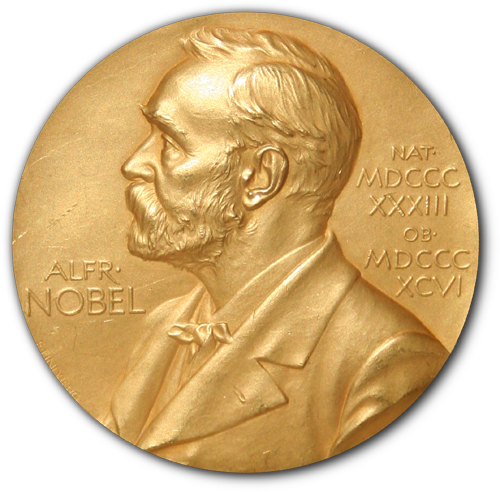


# Proje Genel Tanım

Veri Toplamak için en yaygın yöntemlerden biri olan web scraping temellerini kapsar.

# 1.Tanım

Proje Adi : Nobel Ödül Listesi

Url : https://www.wikizero.com/tr/Nobel_%C3%96d%C3%BCl%C3%BC_sahipleri_listesi

Amaç : Web Scraping ile ham veri oluşturmak ve bu ham veriler üzerinde veri madenciği oluşturmak

Kullanılan Araçlar : Anaconda, Jupyter Notebook, Python.

Nobel Ödül Sahiplarin, yıllara, konularına ve isimlerine göre sınıflandırılması bunların Yıllık ödül sayısını, Konularına göre ödül sayısı ve I.Dünya ve II.Dünya savaşlar içerisinde ödül sayılarını grafiksel olarak veri madenciği oluşturuldu. 

# 2. Jupyter Notebook Nedir?

Aldığınız notları ve hesaplamalarınızı bir arada tutmak için kullanabileceğiniz en başarılı araçlardan biridir. Tekrar edilebilir araştırmada ve veri biliminde sıkça kullanılır.

Jupyter Url : http://jupyter.org/

# 3. Kullanılan Python Kütüphaneleri 

Pandas : Python programlama dili için yüksek performanslı, kullanımı kolay veri yapıları ve veri analiz araçları sağlayan, açık kaynaklı, BSD lisanslı bir Python kütüphanesi. Python with Pandas, finans, ekonomi, istatistik, analitik gibi akademik ve ticari alanlar da dahil olmak üzere çok geniş bir yelpazede kullanılmaktadır.

Numby : Çok boyutlu diziler ve matrisler ile birlikte bu diziler üzerinde çalışacak yüksek düzeyde bir matematiksel işlev koleksiyonu.

Requests : Her türlü HTTP isteğini göndermek için kullanabileceğiniz bir Python modülüdür. URL'lerdeki parametrelerin geçilmesi ile özel başlıkların gönderilmesi ve SSL Doğrulama arasında değişen birçok özellik içeren, kullanımı kolay bir kütüphane.

Matplotlib.pylab : Sadece birkaç satırlık kod ile çizikler, histogramlar, güç spektrumu, çubuk grafikler, hata tabloları, dağılma çizgileri vb. üretebilen Python kütüphanesidir.

Lxml :  Python programlama dilinde XML ve HTML işlemek için en özellik açısından zengin ve kullanımı kolay kütüphanedir.

Datetime : Datetime modülü hem basit ve karmaşık şekillerde tarihleri ve saatleri manipüle için sınıfları sağlamaktadır.

# Veri Madenciliği

Büyük veri kümelerinden desenler belirleme veya keşfetme işlemidir. Veri madenciliği 3 alandan oluşur: içerik madenciliği, kullanım madenciliği, yapı madenciliği.

# Web Scraping

Web kazıma, bir çeşit içerik madenciliğidir, yani haber, yorum, şirket bilgisi vb. dahil olmak üzere web sitelerinden yararlı bilgiler toplamış olursunuz.

# Web Scraping Önce - Haklara Bakın

Herhangi bir bilgiyi web'den Scraping yapmadan önce web sitesinin Hizmet Şartlarını (Hizmet Şartları) okuduğunuzdan emin olun. Çoğu web sitesi, içeriğinin web kazımasına izin vermez. Bazıları ılımlı bir kullanıma izin verir.
#### Temel Kurallar :

--> Kullandığınız bir API olup olmadığını kontrol edin. Hayatınızı kolaylaştıracaktır.

--> Kazıyıcıyı kısa sürede fazla kullanmayın. Sunucuları yavaşlatıyor ve sizi web sitesinden yasaklıyor olabilir.

--> Kamusal olmayan hiçbir şeyi asla kazımayın.

--> İzin verilen yollar için /robots.txt dosyasını kontrol edin

## Gerekli Python Kütüphaneleri

In [1]:
from datetime import datetime

from lxml import html
import requests

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import nbconvert
pd.options.display.max_columns=50



# Web safyası getirilir ve HTML ağacı oluşturulur

In [2]:
def print_element(element):
    print ("<%s %s>%s ..." % (element.tag, element.attrib, element.text_content()[:200].replace("\n", " ")))

In [3]:
sayfa = requests.get('https://www.wikizero.com/tr/Nobel_%C3%96d%C3%BCl%C3%BC_sahipleri_listesi') # Web Sayfası Getirildi
agac = html.fromstring(sayfa.text) # HTML ağacı oluşturuldu
print_element(agac)

<html {'lang': 'tr', 'dir': 'ltr'}>            	     WikiZero - Nobel Ödülü sahipleri listesi                          	 	 	 	  window.dataLayer = window.dataLayer || []; 	  function gtag(){dataLayer.push(arguments);} 	  gtag('js', new ...



# Tablo Bulma


### Önce Tüm Tabloları Bulma

In [4]:
tables = agac.xpath('//table') # web sayfasindaki table isimli hepsini buluyoruz
for table in tables:
    print_element(table)

<table {'class': 'wikitable'}>  Yıl Fizik Kimya Fizyoloji veya Tıp Edebiyat Barış Ekonomi   1901 Röntgen, Wilhelm ConradWilhelm Conrad Röntgen Hoff, Jacobus H. van 'tJacobus H. van 't Hoff von Behring, Emil AdolfEmil Adolf von Beh ...
<table {'class': 'metadata mbox-small plainlinks', 'style': 'border:1px solid #aaa; background-color:#f9f9f9;'}>   Wikimedia Commons'ta Nobel Ödülü sahipleri listesi ile ilgili medyaları bulabilirsiniz.   ...
<table {'class': 'navbox hlist', 'cellspacing': '0', 'style': ';'}>         G T D    Nobel Ödülleri        Kazananlar listesi Ülkelerine göre Üniversitelerine göre           Barış  kazananlar   Edebiyat  kazananlar   Ekonomi  kazananlar   Fizik  kazananlar   Fizyoloj ...
<table {'cellspacing': '0', 'class': 'nowraplinks collapsible expanded', 'style': 'width:100%;background:transparent;color:inherit;;'}>      G T D    Nobel Ödülleri        Kazananlar listesi Ülkelerine göre Üniversitelerine göre           Barış  kazananlar   Edebiyat  kazananlar   Ek

In [5]:
table = agac.xpath('//table[@class="wikitable"]')[0] # burada tablo icerisinde class'ın içerisindeki tüm ilk yazıları alır.
print_element(table)

<table {'class': 'wikitable'}>  Yıl Fizik Kimya Fizyoloji veya Tıp Edebiyat Barış Ekonomi   1901 Röntgen, Wilhelm ConradWilhelm Conrad Röntgen Hoff, Jacobus H. van 'tJacobus H. van 't Hoff von Behring, Emil AdolfEmil Adolf von Beh ...



# Konuların Listesi

In [6]:
konular = [konu[0].text_content().replace("\n"," ") for konu in table.xpath('tr')[0][1:]] # Konuların Özeti
konular

['Fizik', 'Kimya', 'Fizyoloji veya Tıp', 'Edebiyat', 'Barış', 'Ekonomi']

# Yılların Listesi

In [7]:
yillar = [item[0].text for item in table.xpath('tr')[1:-1]] # Yılların Özeti
print(yillar)

['1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


# Kazananların Verilerini Ayıklama

### Tek bir yıllık test

In [8]:
# Kazananların Verileri Ayıklanıyor. Sadece Tek bir yıllık kazanları test ediyor.
for index, item in enumerate(table.xpath('tr')[1][1:]):
    konu = konular[index]
    print ("%s:" % konu)
    for kazanan in item.xpath('a[@class="mw-redirect"]'):
        kazanan_adi = kazanan.attrib["title"]
        kazanan_url = kazanan.attrib["href"]
        print (" - %s" % kazanan_adi)

Fizik:
Kimya:
 - Jacobus H. van 't Hoff
Fizyoloji veya Tıp:
Edebiyat:
Barış:
 - Henry Dunant
Ekonomi:


# Tablonun Tamamı Ayıklama

In [9]:
yil_listesi = []
konu_listesi = []
isim_listesi = []
url_listesi = []
for y_index, yil in enumerate(yillar):
    #print (yil)
    for index, item in enumerate(table.xpath('tr')[y_index + 1][1:]):
        konu = konular[index]
        #print ("%s:" % konu)
        for kazanan in item.xpath('a[@class="mw-redirect"]'):
            kazanan_adi = kazanan.attrib["title"]
            kazanan_url = kazanan.attrib["href"]
            #print (" - %s" % kazanan_adi)
            yil_listesi.append(yil)
            konu_listesi.append(konu)
            isim_listesi.append(kazanan_adi)
            url_listesi.append(kazanan_url)



# Python Kütüphanesi 'Pandas' Özelliği

### Post İşleme - Veri Analizi - Veri Ön İşleme

In [10]:
veri_seti = pd.DataFrame(isim_listesi, columns=["kazanan_adi"])
veri_seti["konu"] = konu_listesi
veri_seti["yil"] = yil_listesi
veri_seti["yil"] = veri_seti["yil"].astype(np.int32)
veri_seti["url"] = url_listesi
veri_seti.head(5)

,kazanan_adi,konu,yil,url
0,Jacobus H. van 't Hoff,Kimya,1901,Jacobus_H._van_%27t_Hoff
1,Henry Dunant,Barış,1901,Henry_Dunant
2,Albert Gobat,Barış,1902,Albert_Gobat
3,Bjørnstjerne Bjørnson,Edebiyat,1903,Bj%C3%B8rnstjerne_Bj%C3%B8rnson
4,Lord Rayleigh,Fizik,1904,Lord_Rayleigh



# Yıllık Ödül Sayısı

In [11]:
yillar_df = veri_seti["yil"].value_counts().sort_index()

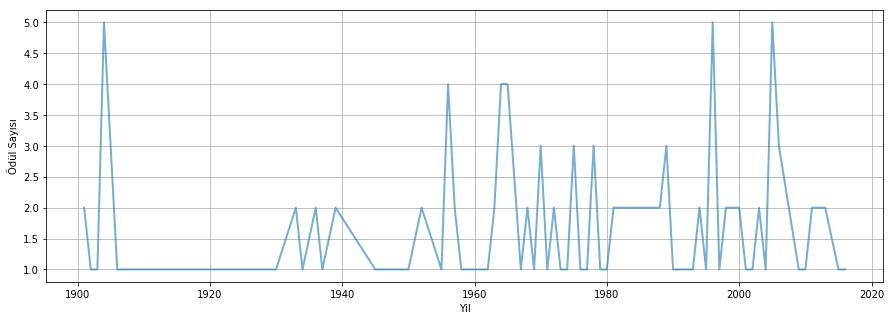

Toplam Ödüller: 130


In [12]:
plt.figure(figsize=(15,5))
plt.plot(yillar_df.index, yillar_df.values, linewidth=2, alpha=.6)
plt.grid()
plt.xlabel("Yil")
plt.ylabel("Ödül Sayısı")
plt.show();
print ("Toplam Ödüller: %s" % len(veri_seti))

# Nobel Ödülleri / Yıl Sayısı

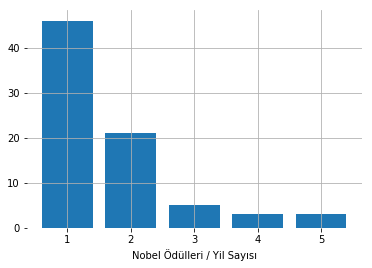

In [13]:
yillar_df.value_counts()
plt.bar(yillar_df.value_counts().index, yillar_df.value_counts())
plt.box(on="off")
plt.grid()
plt.xlabel("Nobel Ödülleri / Yil Sayısı")
plt.show();


# Konuya Göre Ödül Sayısı

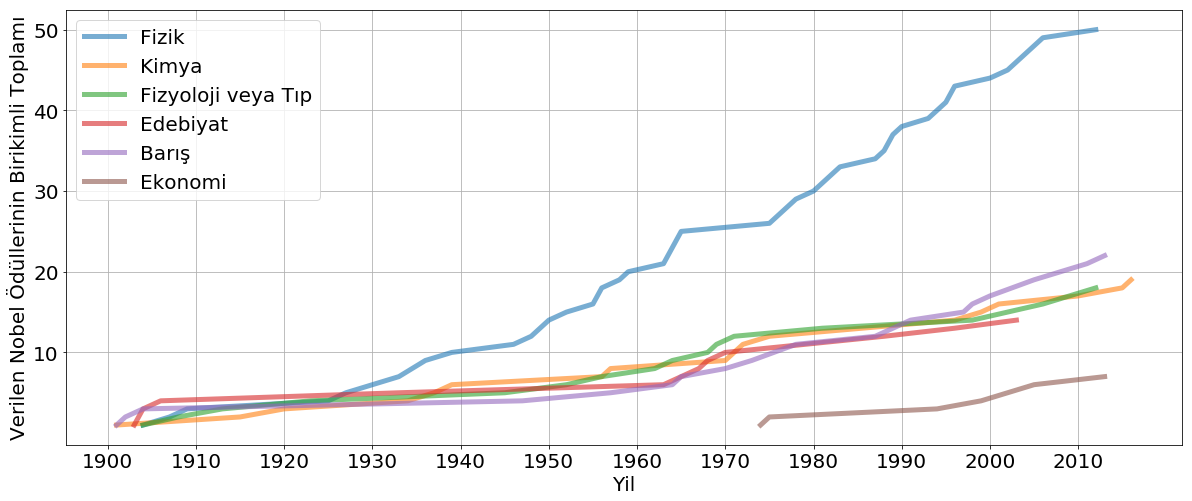

In [14]:
plt.figure(figsize=(13,5))

plt.figure(figsize=(20,8))

for konu in konular:
    df = veri_seti[veri_seti["konu"]==konu]["yil"].value_counts().sort_index().cumsum()
    plt.plot(df.index, df, label=konu, linewidth=5, alpha=.6)


plt.grid()
plt.legend(fontsize=20)
plt.xlabel("Yil",fontsize=20)
plt.ylabel("Verilen Nobel Ödüllerinin Birikimli Toplamı",fontsize=20)
plt.xticks(np.arange(1900, 2020, 10),fontsize=20)
plt.yticks(np.arange(10, 51, 10),fontsize=20)
plt.show();



# Ödüllerin Birinci Dünya Savaşı ve İkinci Dünya Savaşı'nın etkileri

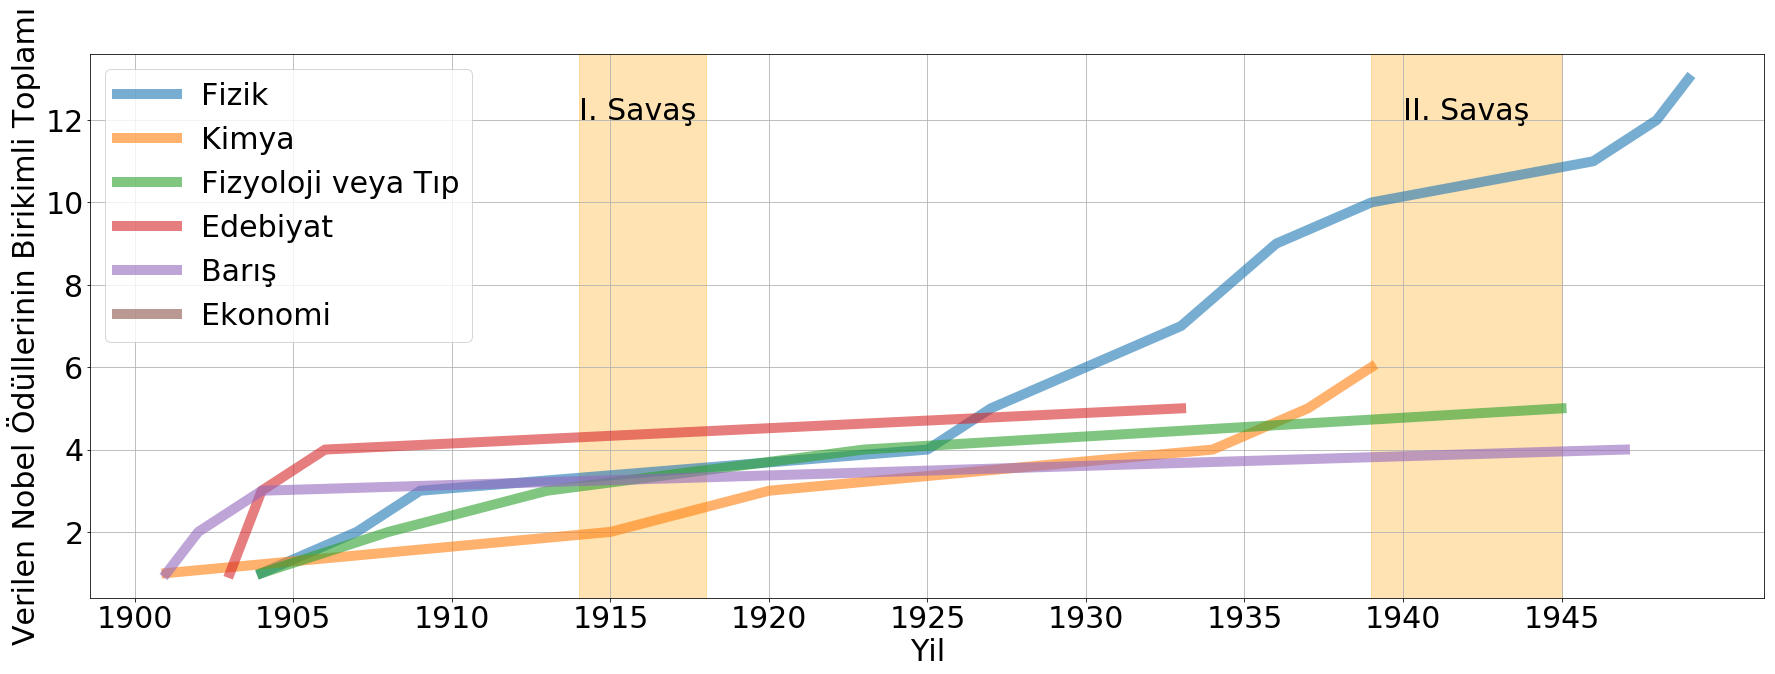

In [15]:
plt.figure(figsize=(30,10))

for konu in konular:
    df = veri_seti[(veri_seti["konu"]==konu) &
                  (veri_seti["yil"].astype(np.int32)<1950)]["yil"].value_counts().sort_index().cumsum()
    plt.plot(df.index, df, label=konu,linewidth=10, alpha=.6)
plt.grid()
plt.legend(fontsize=30)
plt.xlabel("Yil", fontsize=30)
plt.ylabel("Verilen Nobel Ödüllerinin Birikimli Toplamı",fontsize=30)
plt.xticks(np.arange(1900, 1950, 5),fontsize=30)
plt.yticks(np.arange(2, 13, 2),fontsize=30)

gca = plt.gca()

gca.add_patch(plt.Rectangle((1914,0), 4, 60, alpha=.3, color="orange"))
gca.add_patch(plt.Rectangle((1939,0), (45-39), 60, alpha=.3, color="orange"))

plt.annotate(s="I. Savaş", xy=(1914,12),fontsize=30)
plt.annotate(s="II. Savaş", xy=(1940,12),fontsize=30)
plt.show();